# PCA on Dye

In [1]:
# imports
from importlib import reload
import os

import numpy as np
import pandas
import datetime

from matplotlib import pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy

import seaborn as sns

from oceancolor.dye import io as dye_io

from sklearn import decomposition

In [2]:
%matplotlib ipympl

# Load up the data

In [3]:
mat_file = os.path.join(os.getenv('OS_COLOR'), 'data', 'Dye', 
                        '20230120093344to20230120093402PST.mat')

In [4]:
reload(dye_io)
wave, lat, lon, allI = dye_io.extract_cube(mat_file)

## Cut

In [5]:
tot = np.sum(allI, axis=0)
keep = tot > 0.
nkeep = np.sum(keep)
nkeep

1474796

# Pack for PCA

In [6]:
Nrand = 500000
irand = np.random.choice(nkeep, Nrand, replace=False)

In [7]:
idx = np.where(keep)
idx[0].size

1474796

In [8]:
spec =  allI[:,idx[0][irand], idx[1][irand]].T

In [9]:
spec.shape

(500000, 273)

# PCA

In [10]:
pca_fit = decomposition.PCA(n_components=spec.shape[1]).fit(spec)

## Mean

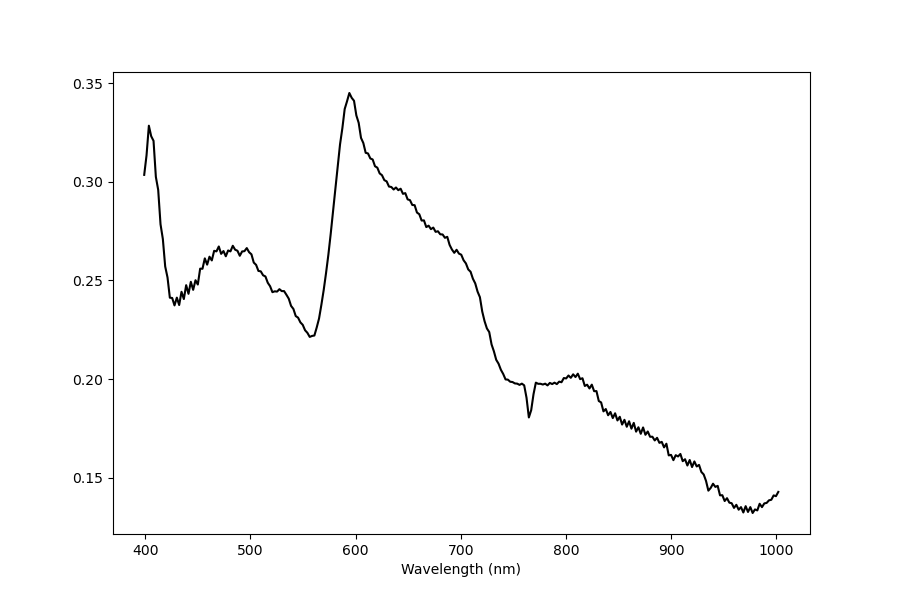

In [18]:
fig = plt.figure(figsize=(9,6))
plt.clf()
ax = plt.gca()

ax.plot(wave, pca_fit.mean_, 'k-')

#
ax.set_xlabel('Wavelength (nm)')

plt.show()

## Variance

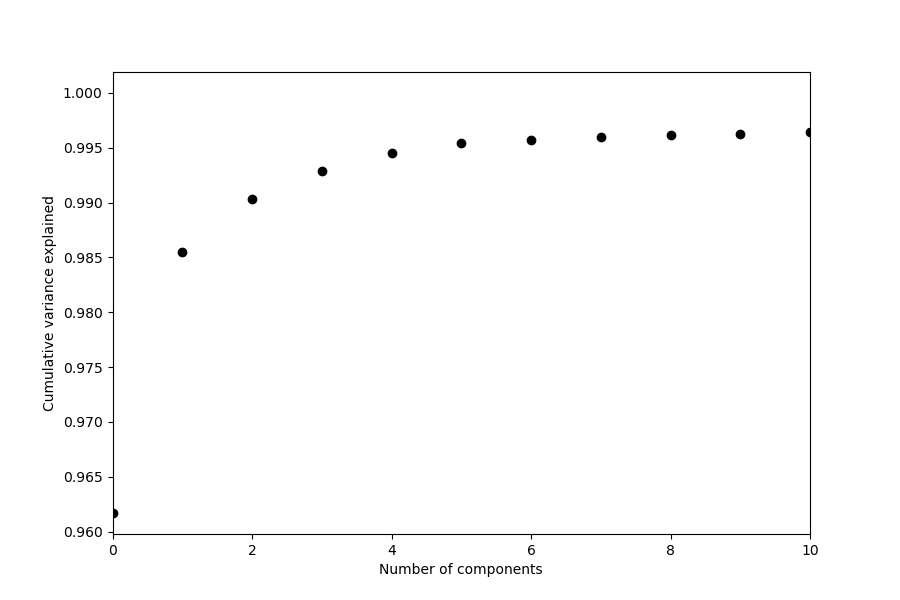

In [20]:
fig = plt.figure(figsize=(9,6))
plt.clf()
ax = plt.gca()

ax.plot(np.cumsum(pca_fit.explained_variance_ratio_), 'ok')
# Label
ax.set_ylabel('Cumulative variance explained')
ax.set_xlabel('Number of components')

ax.set_xlim(0,10.)
#ax.set_ylim(0,1.)

plt.show()

# Fit with 3 components

In [13]:
pca_fit3 = decomposition.PCA(n_components=3).fit(spec)

In [14]:
M = pca_fit3.components_

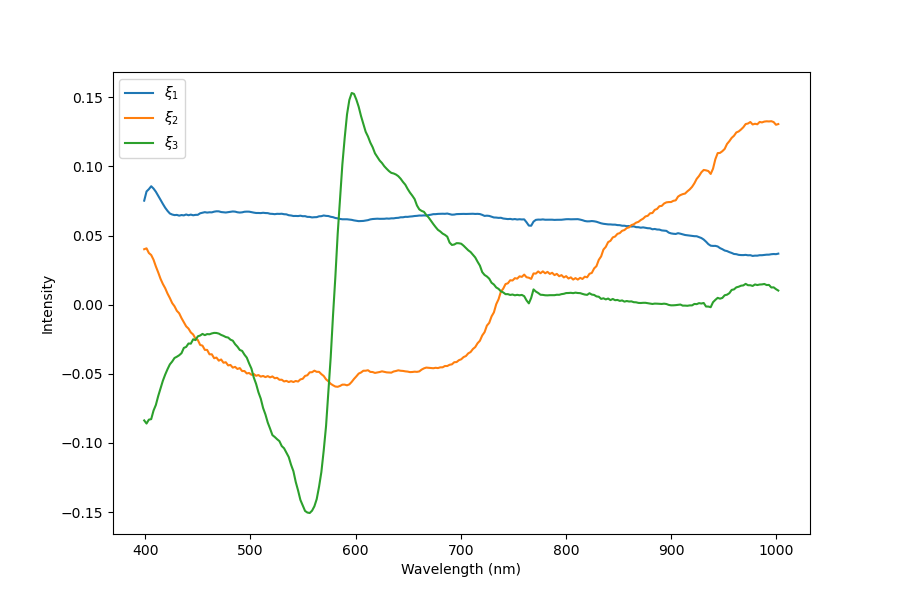

In [17]:
fig = plt.figure(figsize=(9,6))
plt.clf()
ax = plt.gca()
ax.plot(wave, M[0], label=r'$\xi_1$')
ax.plot(wave, M[1], label=r'$\xi_2$')
ax.plot(wave, M[2], label=r'$\xi_3$')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity')
ax.legend()
#
plt.show()

# Coefficients

In [21]:
pca_projected3 = pca_fit3.fit_transform(spec)

In [22]:
pca_projected3.shape

(500000, 3)

## Let's explore!

In [31]:
df = pandas.DataFrame()
df['c1'] = pca_projected3[:,0]
df['c3'] = pca_projected3[:,2]

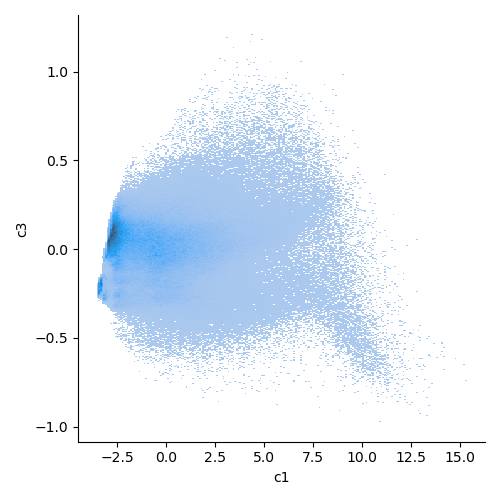

In [32]:
#fig = plt.figure(figsize=(6,6))
#plt.clf()

sns.displot(data=df, x='c1', y='c3')
#
#plt.show()

In [33]:
no_dye_no_bubb = (df.c1 < -3.) & (df.c3 < -0.1)

In [34]:
np.sum(no_dye_no_bubb)

10835

In [35]:
idx_nono = np.where(no_dye_no_bubb)[0]

## Average nono

In [36]:
nono_spec = np.mean(spec[idx_nono,:], axis=0)
nono_spec.shape

(273,)

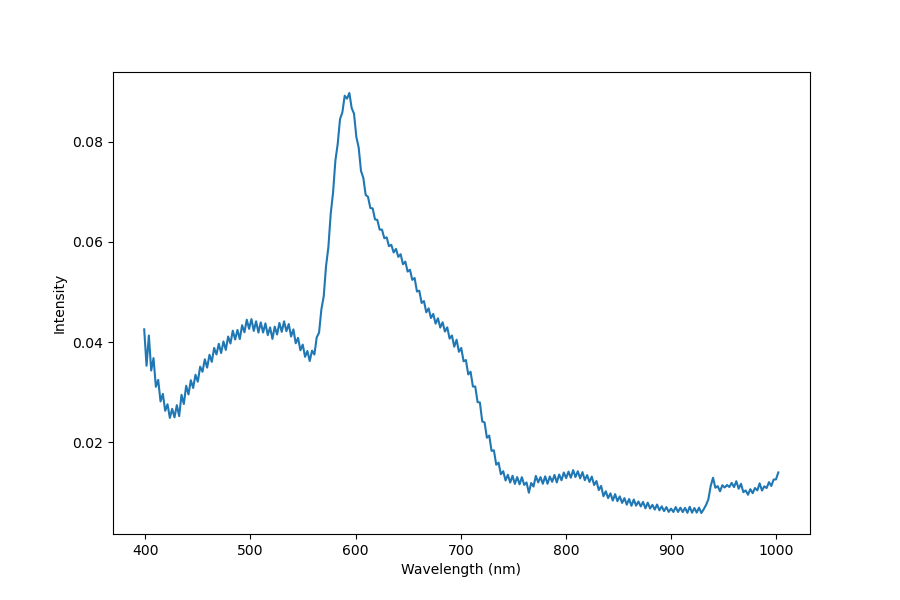

In [37]:
fig = plt.figure(figsize=(9,6))
plt.clf()
ax = plt.gca()
ax.plot(wave, nono_spec)
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity')
#ax.legend()
#
plt.show()